In [132]:
import CoolProp.CoolProp as cp
import numpy as np
from matplotlib import pyplot as plt

In [133]:
def p_inlet(t, p_i_fcv, aprr):
    return p_i_fcv+(aprr/60)*t*1e6
# p_i_fcv : pressure in fuel cell vehicle
# aprr : average pressure rate ramp according to SAE J 2601 standard
# p_inlet calculates the pressure inlet

In [134]:
def redvalve(p_i, p_o, T_in, kp, rho_o):
    del_p = abs(p_i-p_o)/1e5
    rho_i = cp.PropsSI('Dmass', 'T', T_in, 'P', p_i, 'H2')
    kp = kp
    vdot = (2*del_p/(kp*rho_i))**0.5
    mdot = (vdot/3600)*rho_o
    return mdot
# calculates flow rate

In [135]:
P_initial_fcv = 20e5
T_initial_fcv = 25+273.15
V_fcv = 0.15
du_dt = 0
dm_dt = 0
u = cp.PropsSI('U', 'P', P_initial_fcv, 'T', T_initial_fcv, 'H2')
m = V_fcv*cp.PropsSI('D', 'P', P_initial_fcv, 'T', T_initial_fcv, 'H2')
dt = 0.1
t = 0
p_fcv = P_initial_fcv 

In [136]:
time_array = np.array([])
mdot_array = np.array([])
T_array = np.array([])

In [137]:
while p_fcv<700e5:
    u = du_dt*dt+u
    m = dm_dt*dt+m
    rho_fcv = m/V_fcv
    pi_fcv = p_inlet(t, P_initial_fcv, 28.2)
    T_i =-40+273.15
    p_fcv = cp.PropsSI('P', 'U', u, 'Dmass', rho_fcv, 'H2')
    dm_dt = redvalve(pi_fcv, p_fcv, T_i, 0.035, rho_fcv)
    hin = cp.PropsSI('H', 'P', pi_fcv, 'T', T_i, 'H2')
    du_dt = dm_dt*(hin-u)/m
    T_fcv = cp.PropsSI('T', 'U', u, 'Dmass', rho_fcv, 'H2')
    time_array = np.append(t, time_array)
    mdot_array = np.append(dm_dt, mdot_array)
    T_array = np.append(T_fcv, T_array)
    t += dt

In [145]:
T_fcv-273.15

77.95558162124706

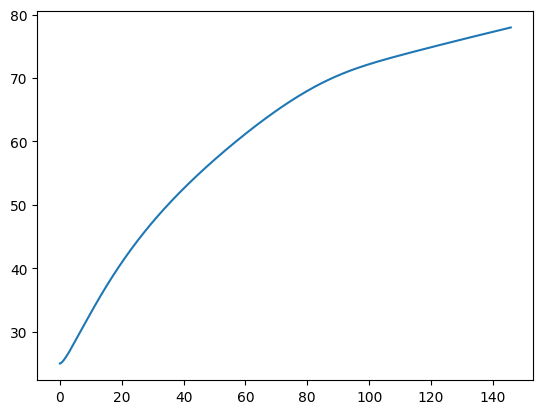

In [142]:
plt.plot(time_array, T_array-273.15)

In [108]:
def wdot_cooling(p, mdot, Tin, r, Tout = -40+273.15):
    hin = cp.PropsSI('H', 'P', p, 'T', Tin, 'H2')
    hout = cp.PropsSI('H', 'P', p, 'T', Tout, 'H2')
    return mdot*(hout-hin)/r

In [ ]:
def T_valve(t, ptank, pi_fcv, Ttank, Tin = -40+273.15):
    pin = p_inlet(t, p_i_fcv, 28.2)
    